# 신경망 만들기

## Step 1. 기본 클래스 만들기
- 구조 정의
- 학습
- 추론

In [13]:
import numpy as np
import scipy.special

In [14]:
# 신경망 클래스 정의
class MyNeuralNet :
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.innode = inputnodes
        self.hnode = hiddennodes
        self.outnode = outputnodes
        
        # 학습률
        self.lr = learningrate
        
        self.wih = np.random.rand(self.hnode, self.innode) -0.5
        self.who = np.random.rand(self.outnode, self.hnode) -0.5
        
        pass
    
    def printWeight(self):
        print(self.wih.shape, self.wih)
        print(self.who.shape, self.who)
        
    # forward and backward
    def train(self, input_list, target_list):
        input = np.array(input_list, ndmin = 2).T
        
        # input -> hidden
        hidden_input = np.dot(self.wih, input)
        hidden_output = scipy.special.expit(hidden_input)
        
        # hidden -> output
        output_hidden = np.dot(self.who, hidden_output)
        final_outputs = scipy.special.expit(output_hidden)
        
        # Get Error
        targets = np.array(target_list, ndmin = 2).T
        output_error = targets - final_outputs
        hidden_error = np.dot(self.who.T, output_error)
        
        # Update weight
        self.who += self.lr * \
                            np.dot((output_error * final_outputs) * (1.0 - final_outputs), \
                            np.transpose(hidden_output))
        
        self.wih += self.lr * \
                            np.dot((hidden_error * hidden_output) * (1.0 - hidden_output), \
                            np.transpose(input))
        
    # forward
    def inference(self, input_list):
        input = np.array(input_list, ndmin = 2).T
        
        # input -> hidden
        hidden_input = np.dot(self.wih, input)
        hidden_output = scipy.special.expit(hidden_input)
        
        # hidden -> output
        output_hidden = np.dot(self.who, hidden_output)
        final_output = scipy.special.expit(output_hidden)
        
        return final_output

In [15]:
net = MyNeuralNet(4, 4, 3, 0.5)
print(net.inference([10,10,20,20]))
net.train([10, 20, 40, 50], [0.5, 0.2, 0.1])
print(net.inference([10,10,20,20]))

[[0.45943792]
 [0.5238013 ]
 [0.52773001]]
[[0.47646203]
 [0.48961156]
 [0.50302406]]


# MNIST

In [1]:
!pip install numpy

In [2]:
!mkdir mnist_data

하위 디렉터리 또는 파일 mnist_data이(가) 이미 있습니다.


In [3]:
mnist_train_url = 'http://www.pjreddie.com/media/files/mnist_train.csv'
mnist_test_url = 'http://www.pjreddie.com/media/files/mnist_test.csv'

In [10]:
import shutil
import requests

def download(url, file_name, file_mode="wb"):
    response = requests.get(url, stream=True)
    with open(file_name, file_mode) as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

In [12]:
# mnist_train_url, mnist_test_url 다운받기
download(mnist_train_url, 'mnist_data/mnist_train_xxxx.csv')

In [16]:
from tqdm import tqdm
import requests

# URL = "http://www.ovh.net/files/10Mb.dat" # big file test
def download(url, file_name, file_mode="wb"):
    # Streaming, so we can iterate over the response.
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get('content-length', 0))
    block_size = 1024  #1 Kibibyte
    progress_bar = tqdm(total=total_size_in_bytes, unit='iB', unit_scale=True)
    with open(file_name, file_mode) as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
    if total_size_in_bytes != 0 and progress_bar.n != total_size_in_bytes:
        print("ERROR, somthing wnt wrong")

In [17]:
download(mnist_train_url, 'mnist_data/mnist_train.csv', 'wb')
download(mnist_test_url, 'mnist_data/mnist_test.csv', 'wb')

100%|██████████████████████████████████████████████████████████████████████████████| 110M/110M [00:18<00:00, 6.04MiB/s]
100%|████████████████████████████████████████████████████████████████████████████| 18.3M/18.3M [00:03<00:00, 4.99MiB/s]


# MNIST_mini 

In [21]:
# 에러메세지는 신경쓰지 말자, 에러를 보기위한 작업

mnist_train_100_url = 'https://git.io/vySZ1'
mnist_test_10_url = 'https://git.io/vySZP'

download(mnist_train_100_url, 'mnist_data/mnist_train_100.csv', 'wb')
download(mnist_test_10_url, 'mnist_data/mnist_test_10.csv', 'wb')

182kiB [00:00, 7.96MiB/s]                                                                                              


ERROR, somthing wnt wrong


18.0kiB [00:00, 1.64MiB/s]                                                                                             

ERROR, somthing wnt wrong


In [22]:
!dir mnist_data

 C 드라이브의 볼륨: Windows10
 볼륨 일련 번호: 2C29-5E06

 C:\Users\user\mnist_data 디렉터리

2021-11-20  오전 11:00    <DIR>          .
2021-11-20  오전 11:00    <DIR>          ..
2021-11-20  오전 11:04        18,289,443 mnist_test.csv
2021-11-20  오전 11:07            18,006 mnist_test_10.csv
2021-11-20  오전 11:00        18,289,443 mnist_text_xxxx.csv
2021-11-20  오전 11:04       109,575,994 mnist_train.csv
2021-11-20  오전 11:07           182,023 mnist_train_100.csv
2021-11-20  오전 11:02       109,575,994 mnist_train_xxxx.csv
               6개 파일         255,930,903 바이트
               2개 디렉터리  20,431,667,200 바이트 남음


In [23]:
import pandas as pd
csv_test = pd.read_csv('mnist_data/mnist_train_100.csv', header=None)
csv_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# pandas가 없는 극한의 환경이라면?

data_file = open("mnist_data/mnist_test_10.csv", "r")
data_list = data_file.readlines()
data_file.close()
len(data_list)
print(data_list[0])

7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0

# Display Image

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Number :  7


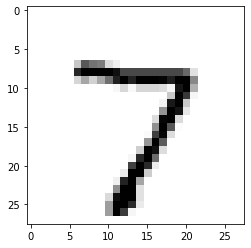

In [27]:
all_values = data_list[0].split(',')
#all_values = csv_test.iloc[0].to_numpy()
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')
print("Number : ", all_values[0])

# Prepare training data

In [28]:
# convert pixel range 0 ~ 255 to 0.01 ~ 1.0

scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)
print(scaled_input.shape)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

- one hot encoding :
컴퓨터 또는 기계는 문자보다는 숫자를 더 잘 처리 할 수 있습니다. 이를 위해 자연어 처리에서는 문자를 숫자로 바꾸는 여러가지 기법들이 있습니다. 원-핫 인코딩(One-Hot Encoding)은 그 많은 기법 중에서 단어를 표현하는 가장 기본적인 표현 방법이며, 머신 러닝, 딥 러닝을 하기 위해서는 반드시 배워야 하는 표현 방법입니다.

- https://wikidocs.net/22647

In [29]:
# label (0.01 ~ 0.99)
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(all_values[0], targets)

7 [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


# train
- 학습코드

In [51]:
input_nodes = 784
hidden_nodes = 340
output_nodes = 10

learning_rate = 0.07

# epoch :전체 학습데이터를 몇바퀴 돌것이냐
epoch = 4

n = MyNeuralNet(input_nodes, hidden_nodes, output_nodes, learning_rate)
# n.printWeight()

In [52]:
training_data_file = open("mnist_data/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [53]:
from tqdm import tqdm

for i in range(epoch):
    print("======= {} epoch =======".format(i+1))
    progress_bar = tqdm(total=len(training_data_list), unit='iB', unit_scale=True)
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

        progress_bar.update(1)
    progress_bar.close()

  0%|                                                                               | 20.0/60.0k [00:00<05:14, 190iB/s]

======= 1 epoch =======


100%|██████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [04:28<00:00, 223iB/s]
  0%|                                                                               | 24.0/60.0k [00:00<04:17, 233iB/s]

======= 2 epoch =======


100%|██████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [04:37<00:00, 216iB/s]
  0%|                                                                               | 22.0/60.0k [00:00<04:32, 220iB/s]

======= 3 epoch =======


100%|██████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [04:25<00:00, 226iB/s]
  0%|                                                                               | 23.0/60.0k [00:00<04:33, 219iB/s]

======= 4 epoch =======


100%|██████████████████████████████████████████████████████████████████████████████| 60.0k/60.0k [04:45<00:00, 210iB/s]


In [54]:
# epoch = 3

# for i in range(epoch):    
#     progress_bar = tqdm(total=len(training_data_list), unit='iB', unit_scale=True)
#     for record in training_data_list:
#         all_values = record.split(',')
#         inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#         targets = np.zeros(output_nodes) + 0.01
#         targets[int(all_values[0])] = 0.99
#         n.train(inputs, targets)

#         progress_bar.update(1)
#     progress_bar.close()

In [55]:
test_data_list_file = open("mnist_data/mnist_test.csv", "r")
test_data_list = test_data_list_file.readlines()
test_data_list_file.close()

In [56]:
# matchfalse = 0

# for record in test_data_list:
#     all_values = record.split(',')
#     inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#     result = n.inference(inputs)
#     print("test result : {} / {}".format(all_values[0], result.argmax()))
    
#     if int(all_values[0]) != int(result.argmax()):
#         matchfalse += 1
        
# print(str(matchfalse/len(test_data_list)*100)+"%")

In [57]:
score = []

for record in test_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    result = n.inference(inputs)
       
    if int(all_values[0]) == result.argmax():
        score.append(1)
    else:
        score.append(0)
score_array = np.asarray(score)
print("performance = ", score_array.sum() / score_array.size)

performance =  0.9737
